In [ ]:
!ls

kaggle.json  sample_data


In [ ]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d gti-upm/leapgestrecog

Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
 99% 2.11G/2.13G [00:18<00:00, 224MB/s]
100% 2.13G/2.13G [00:18<00:00, 123MB/s]


In [ ]:
!unzip leapgestrecog.zip

Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0012.png  
  inflating: leapgestrecog/leapGestRe

In [ ]:
!ls /content/leapGestRecog


00  01	02  03	04  05	06  07	08  09


In [ ]:
import tensorflow as tf

dataset_path = "/content/leapGestRecog"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(128,128),
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128,128),
    batch_size=32
)

#SAVE class names here
class_names = train_ds.class_names


Found 20000 files belonging to 10 classes.
Using 16000 files for training.
Found 20000 files belonging to 10 classes.
Using 4000 files for validation.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
from tensorflow.keras import layers, models

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(128,128,3)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15
)

Epoch 1/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.3902 - loss: 1.6859 - val_accuracy: 0.9405 - val_loss: 0.2079
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.8794 - loss: 0.3513 - val_accuracy: 0.9797 - val_loss: 0.0507
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9379 - loss: 0.1719 - val_accuracy: 0.9885 - val_loss: 0.0258
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9573 - loss: 0.1152 - val_accuracy: 0.9877 - val_loss: 0.0209
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9639 - loss: 0.0981 - val_accuracy: 0.9887 - val_loss: 0.0308
Epoch 6/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9692 - loss: 0.0849 - val_accuracy: 0.9933 - val_loss: 0.0135
Epoch 7/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9710 - loss: 0.0757 - val_accuracy: 0.9902 - val_loss: 0.0176
Epoch 8/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9767 - loss: 0.0591 - 

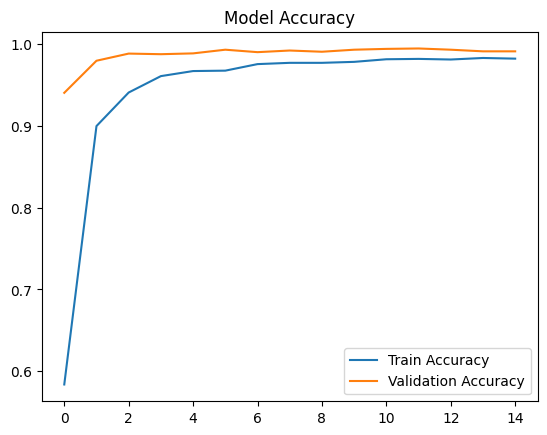

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train Accuracy', 'Validation Accuracy'])
plt.title("Model Accuracy")
plt.show()

In [ ]:
model.save("gesture_model.h5")

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


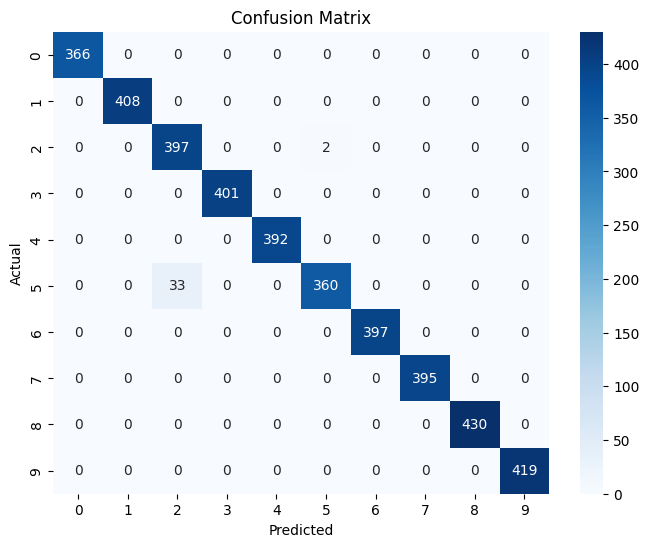

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

#Get true labels
y_true = np.concatenate([y for x, y in val_ds], axis=0)

#Get predictions
y_pred_probs = model.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

#Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       366
           1       1.00      1.00      1.00       408
           2       0.92      0.99      0.96       399
           3       1.00      1.00      1.00       401
           4       1.00      1.00      1.00       392
           5       0.99      0.92      0.95       393
           6       1.00      1.00      1.00       397
           7       1.00      1.00      1.00       395
           8       1.00      1.00      1.00       430
           9       1.00      1.00      1.00       419

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



In [ ]:
pip install opencv-python

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach(track => track.stop());
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
  ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename


In [41]:
image_path = take_photo()

<IPython.core.display.Javascript object>

In [42]:
import os
import cv2
import numpy as np


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predicted Gesture: 08


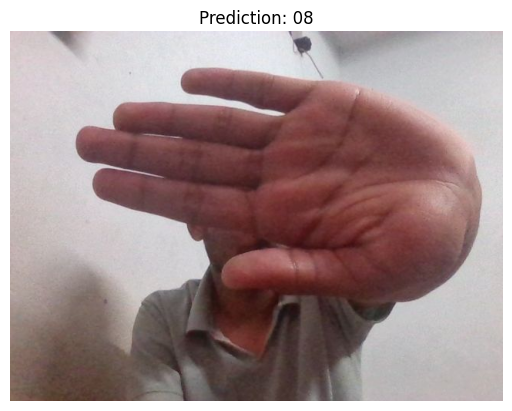

In [43]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

#Load model
model = load_model("gesture_model.h5")

#Get class names
class_names = sorted(os.listdir("/content/leapGestRecog"))

#Read captured image
img = cv2.imread(image_path)

img_resized = cv2.resize(img, (128,128))
img_normalized = img_resized / 255.0
img_input = np.expand_dims(img_normalized, axis=0)

#Prediction
prediction = model.predict(img_input)
class_index = np.argmax(prediction)
label = class_names[class_index]

print("Predicted Gesture:", label)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f"Prediction: {label}")
plt.axis('off')
plt.show()